In [126]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [127]:
# Read in the cleaned training dataset
df = pd.read_csv('../datasets/X_y_features.csv')

In [128]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']
print(X.shape)
print(y.shape)

(2047, 235)
(2047,)


# Train/Test Split

In [129]:
# Perform Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=13)

#Standardize training and test set
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [130]:
# Log transform Y_train and y_test
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Ridge Regression

In [131]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.

ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5) # 5-fold CV

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_sc, y_train_log);

# This code is from 4.02-lesson-regularization

In [132]:
# Here is the optimal value of alpha
ridge_cv.alpha_

422.9242874389499

In [133]:
print('Training score: ', ridge_cv.score(X_train_sc, y_train_log))
print('Test score: ', ridge_cv.score(X_test_sc, y_test_log))

Training score:  0.9286145550322674
Test score:  0.9246278190639229


In [134]:
# Predict sales price values on test set
y_pred = ridge_cv.predict(X_test_sc)

In [135]:
# Fid residuals - difference between predicted target values and actual
resids = y_test_log - y_pred

In [136]:
# RMSE value for test set
np.sqrt(mean_squared_error(np.exp(y_test_log), np.exp(y_pred)))

21075.533775296994

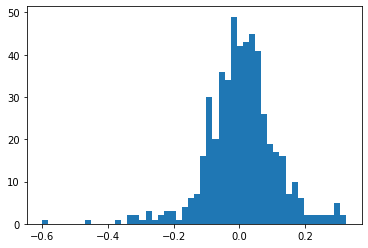

In [137]:
# Plot a histogram of our residuals
plt.hist(resids, bins=50);

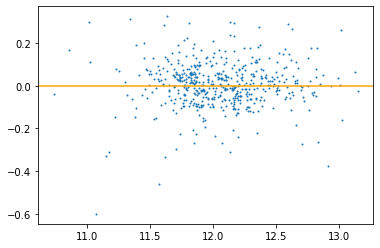

In [138]:
# Plot a scatter of predctions vs residuals.  Should be nice and tight and close to 0.
plt.scatter(y_pred, resids, s=1)
plt.axhline(0, color="orange");

''

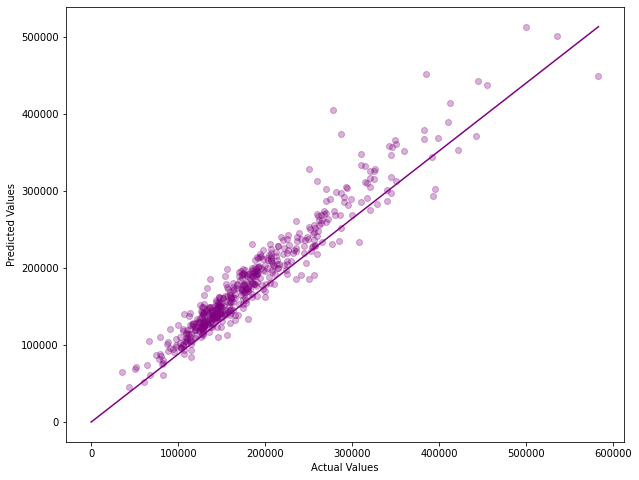

In [139]:
# Plot predicted target values vs actual on scatterplot
plt.figure(figsize=(10,8))
plt.scatter(np.exp(y_test_log), np.exp(y_pred), color = 'purple', alpha=.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([0,np.max(np.exp(y_test_log))],[0,np.max(np.exp(y_pred))], color = 'purple')
plt.savefig('../figs/pred_vs_actual.png')
;


# Lasso

In [140]:
# Set up a list of Lasso alphas to check.

l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.

lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!

lasso_cv.fit(X_train_sc, y_train_log)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=50000)

In [141]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.0030538555088334154

In [142]:
# Get R2 for train and test data
print('Training score: ', lasso_cv.score(X_train_sc, y_train_log))
print('Test score: ', lasso_cv.score(X_test_sc, y_test_log))

Training score:  0.9271579077473413
Test score:  0.929105401935364


In [143]:
# Get predictions from lasso regression
y_pred_lasso = lasso_cv.predict(X_test_sc)

In [144]:
# Get residuals from lasso
lasso_resids = y_test_log - y_pred

In [145]:
# Calculate RMSE from lasso
np.sqrt(mean_squared_error(np.exp(y_test_log), np.exp(y_pred_lasso)))

20909.813572341725

In [146]:
# Pull out the coefficients for Lasso regression
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coef Value': lasso_cv.coef_
})
coef_df['abs coef val'] = abs(coef_df['Coef Value'])
coef_df = coef_df[coef_df['Coef Value'] != 0].sort_values('abs coef val', ascending = False).head(20)
coef_df = coef_df[['Variable', 'Coef Value']]
coef_df.set_index('Variable', inplace=True)
# From Caroline's review lecture

<Figure size 720x720 with 0 Axes>

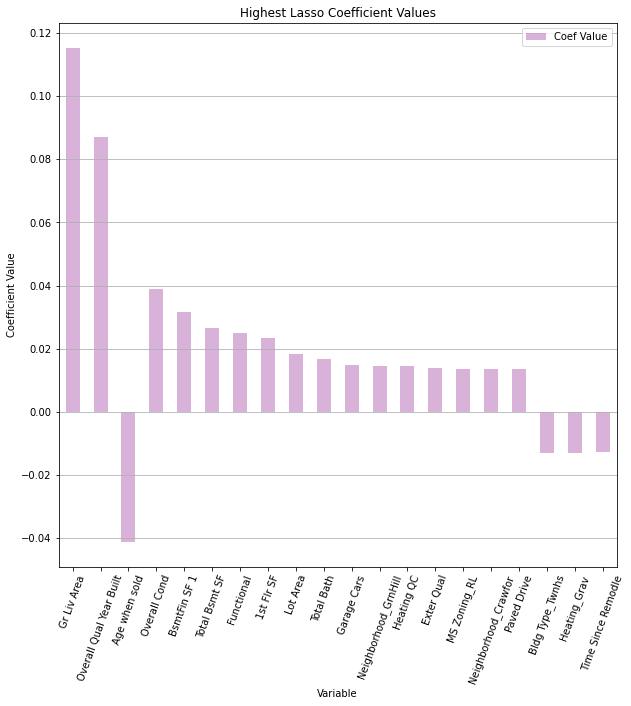

In [147]:
# Plot the highest absolute value coefficients 
plt.figure(figsize = (10,10))
coef_df.plot.bar(color='purple', alpha = .3, figsize=(10,10))
plt.grid(axis='y')

# rotate lable names
plt.xticks(rotation = 70)
plt.xlabel('Variable')
plt.ylabel('Coefficient Value')

# title
plt.title('Highest Lasso Coefficient Values');
plt.savefig("../figs/lasso_coefs.png")

# Linear Regression

In [148]:
# Using Lasso coefficients as a guide, select features likely to be successful in prediction target in a linear modle
lm_features = ['Gr Liv Area', 'Overall Qual', 'Year Built', 'Age when sold', 'Overall Cond', 'BsmtFin SF 1',
              'Total Bsmt SF', 'Functional', '1st Flr SF', 'Lot Area', 'Total Bath', 'Garage Cars', 'Heating QC',
              'Exter Qual',  'Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide',
               'Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
               'Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk',
               'Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes',
               'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer',
               'Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber',
               'Neighborhood_Veenker']

In [149]:
# Create a new X dataframe with only features listed above
lm_X = X[lm_features]

In [150]:
# Do a new train test split with features 
X_train, X_test, y_train, y_test = train_test_split(lm_X, y, random_state=13)

In [151]:
# Log transform Y_train and y_test
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [152]:
# Instantiate linear model
lr = LinearRegression()

In [153]:
# Fit the model on training data
lr.fit(X_train, y_train_log)

LinearRegression()

In [154]:
# R2 score for training data
lr.score(X_train, y_train_log)

0.9074429572768401

In [155]:
# R2 score for test data
lr.score(X_test, y_test_log)

0.9089734493320637

In [156]:
# Get predictions for linear model
y_pred_lr = lr.predict(X_test)

In [157]:
# Get RMSE for test data
np.sqrt(mean_squared_error(y_test, np.exp(y_pred_lr)))

23423.669008796125

In [158]:
# Grab all the neighborhood names for plot
neighborhood_features = ['Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide',
               'Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
               'Neighborhood_Gilbert','Neighborhood_Greens','Neighborhood_GrnHill','Neighborhood_IDOTRR','Neighborhood_Landmrk',
               'Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes',
               'Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer',
               'Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber',
               'Neighborhood_Veenker']

In [159]:
# Get the coefficients for linear model results and put in dataframe
lm_df = pd.DataFrame(lr.coef_, index=lm_features)

In [160]:
# Subset coefficient dataframe to only include Neighborhood dummys
neighborhood = lm_df.loc[ neighborhood_features , : ].sort_values(by = 0, ascending = False)

In [161]:
# Git rid of the 'Neighborhood_' prefix
neighborhood.index = neighborhood.index.str.replace("Neighborhood_", "")


In [162]:
neighborhood

,0
GrnHill,0.465314
Crawfor,0.138108
StoneBr,0.129147
NridgHt,0.100351
ClearCr,0.100346
Greens,0.077174
Somerst,0.064536
Gilbert,0.050075
Timber,0.047131
CollgCr,0.037858


<Figure size 720x432 with 0 Axes>

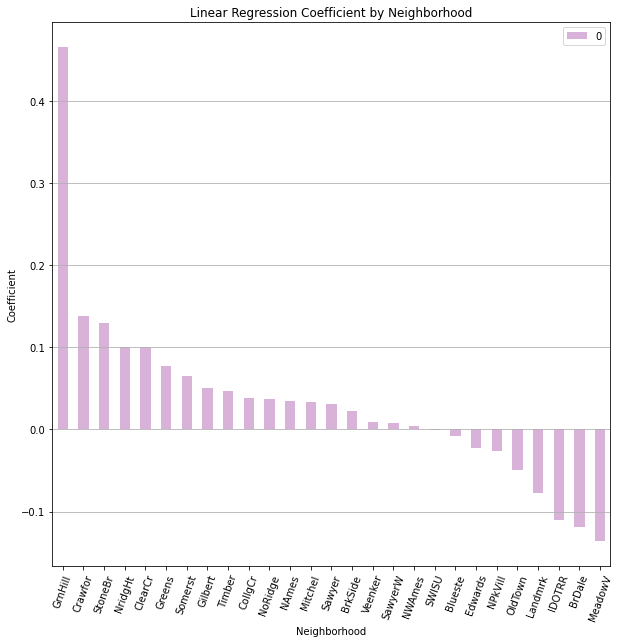

In [163]:
# Make a bar plot ranking the most desirable neighborhoods
# Showcases the lift on housing price just by choosing a neighborhood

#increase size
plt.figure(figsize = (10,6))


neighborhood.plot.bar(color='purple', alpha = .3, figsize = (10,10))
plt.grid(axis='y')


# rotate lable names
plt.xticks(rotation = 70)
plt.xlabel('Neighborhood')
plt.ylabel('Coefficient')

# title
plt.title('Linear Regression Coefficient by Neighborhood')
plt.savefig("../figs/neighborhood_bar.png")

# Retrain on full dataset: Ridge

In [164]:
# Retrain the regression on the whole dataset
X_sc = ss.fit_transform(X)
y_log = np.log(y)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.

ridge_full = RidgeCV(alphas=r_alphas, scoring='r2', cv=5) # 5-fold CV

# Fit model using best ridge alpha!
ridge_full.fit(X_sc, y_log);

# This code is from 4.02-lesson-regularization

In [165]:
# Here is the optimal value of alpha
ridge_full.alpha_

422.9242874389499

In [166]:
# Get the R2 for the full model
print('Full score: ', ridge_full.score(X_sc, y_log))

Full score:  0.9310922266964414


In [167]:
np.sqrt(mean_squared_error(np.exp(y_log), ridge_cv.predict(X_sc)))

198088.69730071968

# Retrain on full dataset: Laso

In [180]:
# Retrain the regression on the whole dataset
X_sc = ss.fit_transform(X)
y_log = np.log(y)

# Set up a list of Lasso alphas to check.

l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.

lasso_full = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!

lasso_full.fit(X_sc, y_log)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=50000)

In [181]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.004037017258596553

In [182]:
# Get R2 for train and test data
print('Training score: ', lasso_cv.score(X_sc, y_log))

Training score:  0.9258106657059963


In [183]:
# Get predictions from lasso regression
y_pred_lasso_full = lasso_cv.predict(X_sc)

In [184]:
# Calculate RMSE from lasso
np.sqrt(mean_squared_error(np.exp(y_log), np.exp(y_pred_lasso_full)))

18773.566576007637

# LOAD TEST DATA

In [185]:
# Load the clean test data
test_clean = pd.read_csv('../datasets/test_clean_features.csv')
test_clean.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,...,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010
0,2658,69.0,9142,4,4,3,6,8,1910,1950,...,0,0,0,0,0,0,0,0,0,0
1,2718,0.0,9662,3,4,3,5,4,1977,1977,...,0,1,0,0,0,0,0,0,0,0
2,2414,58.0,17104,3,4,3,7,5,2006,2006,...,0,0,1,0,0,0,0,0,0,0
3,1989,60.0,8520,4,4,3,5,6,1923,2006,...,1,0,0,0,0,0,1,0,0,0
4,625,0.0,9500,3,4,3,6,5,1963,1963,...,1,0,0,0,0,0,0,0,1,0


In [186]:
# Drop the Id column for now
test_clean.drop(columns='Id', inplace=True)

In [187]:
test_clean.shape

(878, 232)

In [188]:
# Add interaction variables to test set
test_clean['Overall Qual Gr Liv Area'] = test_clean['Overall Qual'] * test_clean['Gr Liv Area']
test_clean['Overall Qual Year Built'] = test_clean['Overall Qual'] * test_clean['Year Built']
test_clean['Overall Qual Year Remod/Add'] = test_clean['Overall Qual'] * test_clean['Year Remod/Add']

In [189]:
# Scale the test data
test_sc = ss.transform(test_clean)

# Predict sale price for the test data
predictions = lasso_full.predict(test_sc)

# Square the predictions to create predictions that make sense
predictions = np.exp(predictions)

In [190]:
# Read test data back in to get ID column
id_file = pd.read_csv('../datasets/test_clean.csv')
id_file['SalePrice'] = predictions

# Create submission data and save
submission = id_file[['Id','SalePrice']]
submission.to_csv('../submissions/lasso_new_poly_features.csv',index=False)



In [191]:
# View submission data
submission.head()

,Id,SalePrice
0,2658,134808.263353
1,2718,161614.522646
2,2414,215887.636309
3,1989,101789.785327
4,625,171890.376590
